# Normalise mRNA data across samples

Pre-prosessing of mRNA data

### Aim:
- Compare and normalise gene expression values across samples

### Note:
- Gene expression data has been already normalised throuh SST-RMA analysis using the Affymetrix software in a per sample manner. Here we further normalise samples samples together, so that they become comparable to each other.

In [2]:
sessionInfo()

R version 3.5.0 (2018-04-23)
Platform: x86_64-apple-darwin15.6.0 (64-bit)
Running under: macOS High Sierra 10.13.6

Matrix products: default
BLAS: /Library/Frameworks/R.framework/Versions/3.5/Resources/lib/libRblas.0.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/3.5/Resources/lib/libRlapack.dylib

locale:
[1] C/UTF-8/C/C/C/C

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] compiler_3.5.0  IRdisplay_0.6.1 pbdZMQ_0.3-3    tools_3.5.0    
 [5] htmltools_0.3.6 base64enc_0.1-3 crayon_1.3.4    Rcpp_1.0.1     
 [9] uuid_0.1-2      IRkernel_0.8.14 jsonlite_1.6    digest_0.6.18  
[13] repr_0.17       evaluate_0.13  

## Install packages

In [ ]:
#source("http://bioconductor.org/biocLite.R")

In [ ]:
#biocLite()

In [ ]:
#biocLite("affy")

In [ ]:
#biocLite("gcrma")

In [ ]:
#biocLite("limma")

In [ ]:
#biocLite("vsn")

In [ ]:
#biocLite("reshape")

## Load packages

In [5]:
setwd("~/git_repos/HGSOC_TME_Heterogeneity/Scripts/1/")

In [6]:
library(gplots)
library(affy)
library(limma)
library(reshape)
library(ggplot2)


Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess

Warning message:
“package ‘affy’ was built under R version 3.5.1”Loading required package: BiocGenerics
Warning message:
“package ‘BiocGenerics’ was built under R version 3.5.1”Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    Filter, Find, Map, Position, Reduce, anyDuplicated, append,
    as.data.frame, basename, cbind, colMeans, colSums, colnames,
    dirname, do.call, duplicated, eval, evalq, get, grep, grepl,
    intersect, is.unsorted, lapply, lengths, mapply, match, mget,
    order, paste, pm

## Load expression data

In [7]:
data <- read.table("~/git_repos/HGSOC_TME_Heterogeneity/Data/1/TreatmentNaive_log2exp_data.txt",
                   header=T,
                   sep='\t')

In [8]:
head(data)

Hugo_Symbol,A01,A02,A03,A04,A05,A06,A07,A08,A09,⋯,C06,C07,C08,C09,C10,C11,C12,D01,D02,D03
A1BG,4.19,3.87,4.86,4.08,4.14,3.75,4.08,4.24,4.32,⋯,3.88,4.40,4.22,4.47,4.13,3.96,4.16,3.92,3.67,4.59
A2BP1,4.03,4.02,3.75,3.82,4.16,3.43,3.86,3.71,3.52,⋯,5.07,3.77,4.16,4.11,4.20,3.53,3.77,3.61,3.86,4.99
A2M,12.61,11.38,12.09,9.18,10.09,11.90,7.08,11.51,12.67,⋯,9.22,9.10,8.88,7.04,6.75,9.07,12.09,10.29,11.70,9.02
A2ML1,4.02,3.98,3.80,3.69,3.42,3.88,4.32,3.93,4.22,⋯,4.31,3.84,3.30,3.73,3.69,3.76,3.78,4.01,3.66,3.46
A4GALT,3.66,3.85,4.06,4.02,3.81,4.05,5.40,4.53,4.23,⋯,4.25,4.68,4.06,3.73,4.58,4.87,4.26,5.10,4.84,4.20
A4GNT,3.80,3.55,3.29,3.41,3.26,3.85,3.76,3.12,3.45,⋯,3.98,3.88,3.36,3.74,3.60,3.00,3.61,3.60,3.82,3.54


In [9]:
data_mtx <- as.matrix(data[,2:39])

## Visualise gene expression distributions

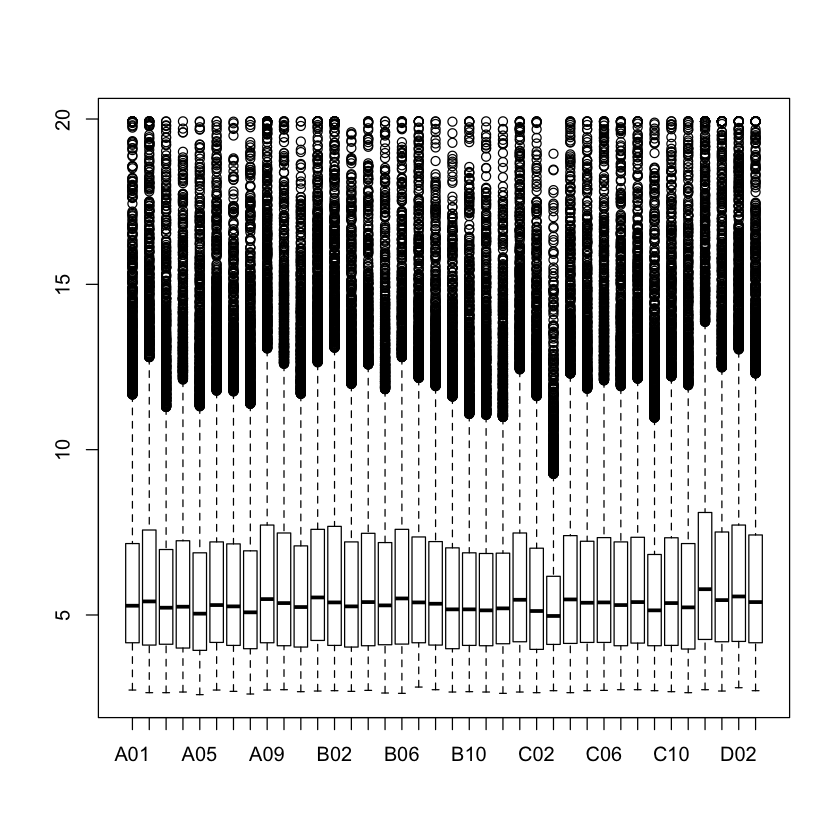

In [10]:
boxplot(data_mtx)

In [11]:
data_stacked = melt(data)

Using Hugo_Symbol as id variables


In [12]:
head(data_stacked)

Hugo_Symbol,variable,value
A1BG,A01,4.19
A2BP1,A01,4.03
A2M,A01,12.61
A2ML1,A01,4.02
A4GALT,A01,3.66
A4GNT,A01,3.80


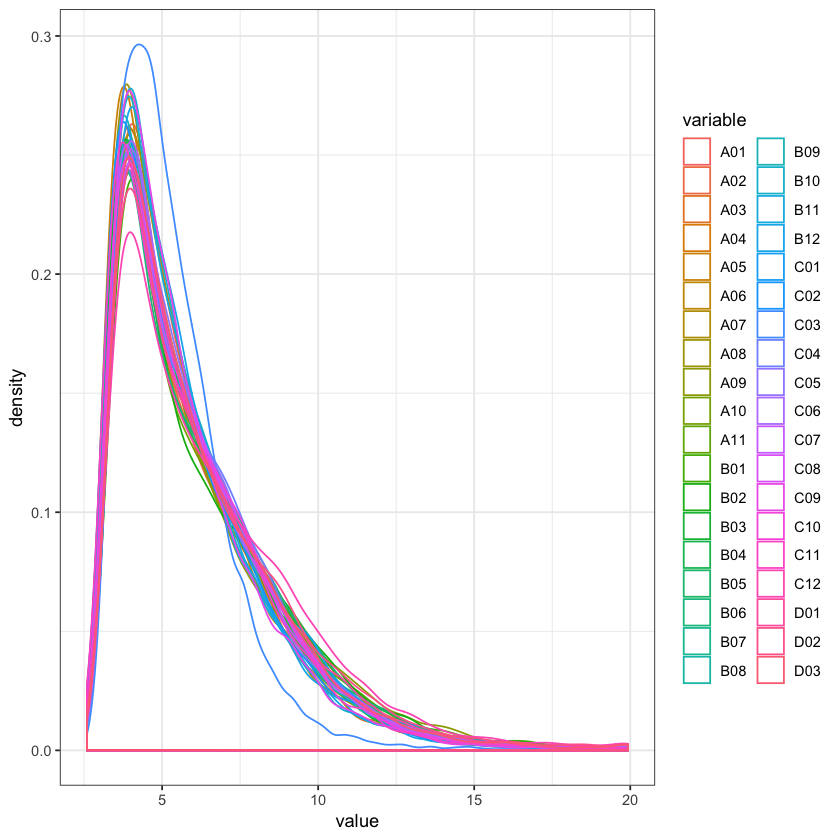

In [13]:
p <- ggplot(aes(x=value, colour=variable),
            data=data_stacked)

p + geom_density() + theme_bw()

## Test gene expression distribution difference

Kruskal-Wallis test by rank is a non-parametric alternative to one-way ANOVA test, which extends the two-samples Wilcoxon test in the situation where there are more than two groups. It’s recommended when the assumptions of one-way ANOVA test are not met.

In [14]:
kruskal.test(as.data.frame(data_mtx))


	Kruskal-Wallis rank sum test

data:  as.data.frame(data_mtx)
Kruskal-Wallis chi-squared = 2775.4, df = 37, p-value < 2.2e-16


At least one sample has different expression values than the others. Thus we proceed to normalise across samples.

## Normalise expression data

In [15]:
data_norm <- normalize.loess(data_mtx,
                             family.loess="gaussian")

Done with 1 vs 2 in iteration 1 
Done with 1 vs 3 in iteration 1 
Done with 1 vs 4 in iteration 1 
Done with 1 vs 5 in iteration 1 
Done with 1 vs 6 in iteration 1 
Done with 1 vs 7 in iteration 1 
Done with 1 vs 8 in iteration 1 
Done with 1 vs 9 in iteration 1 
Done with 1 vs 10 in iteration 1 
Done with 1 vs 11 in iteration 1 
Done with 1 vs 12 in iteration 1 
Done with 1 vs 13 in iteration 1 
Done with 1 vs 14 in iteration 1 
Done with 1 vs 15 in iteration 1 
Done with 1 vs 16 in iteration 1 
Done with 1 vs 17 in iteration 1 
Done with 1 vs 18 in iteration 1 
Done with 1 vs 19 in iteration 1 
Done with 1 vs 20 in iteration 1 
Done with 1 vs 21 in iteration 1 
Done with 1 vs 22 in iteration 1 
Done with 1 vs 23 in iteration 1 
Done with 1 vs 24 in iteration 1 
Done with 1 vs 25 in iteration 1 
Done with 1 vs 26 in iteration 1 
Done with 1 vs 27 in iteration 1 
Done with 1 vs 28 in iteration 1 
Done with 1 vs 29 in iteration 1 
Done with 1 vs 30 in iteration 1 
Done with 1 vs 31 in i

## Visualise gene normalised distributions

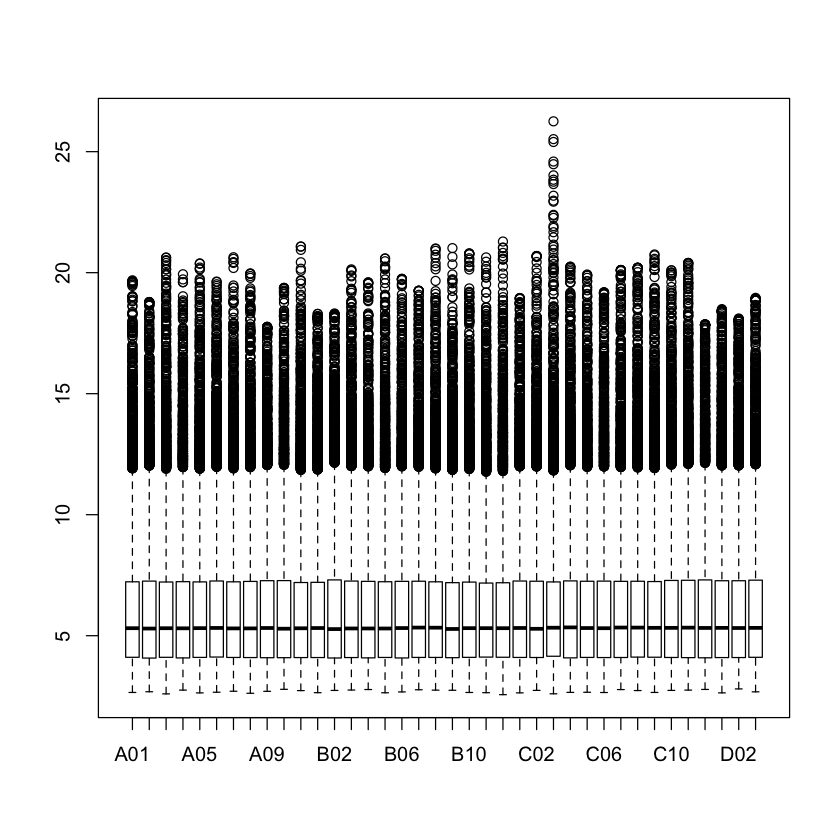

In [16]:
boxplot(data_norm)

In [17]:
data_stacked = melt(data_norm)

In [18]:
head(data_stacked)

X1,X2,value
1,A01,4.127393
2,A01,3.964749
3,A01,12.617659
4,A01,3.950031
5,A01,3.601348
6,A01,3.721101


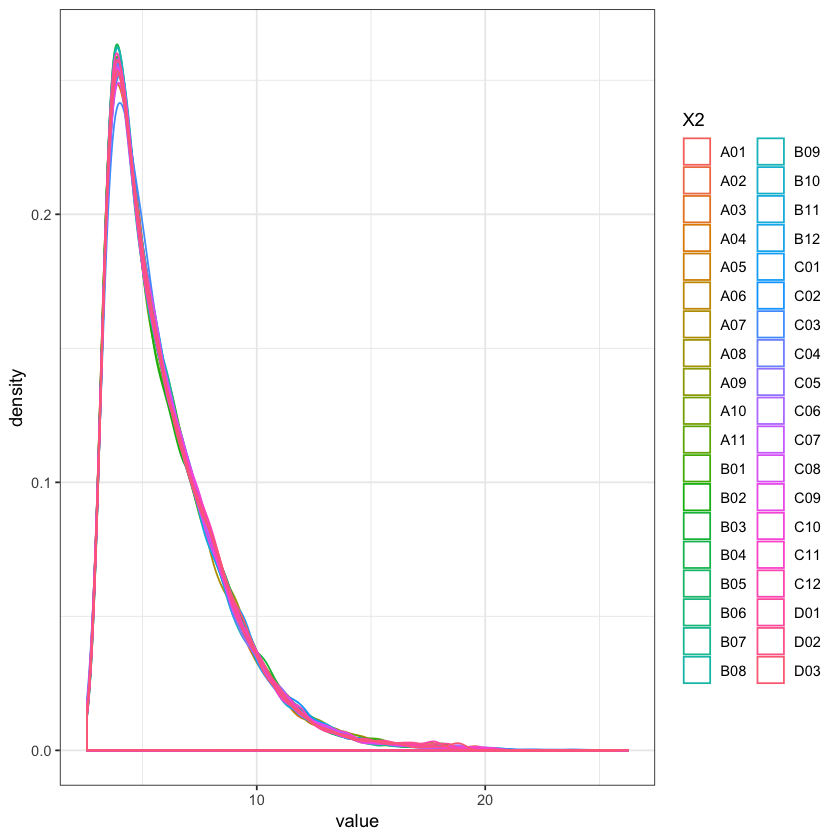

In [19]:
p <- ggplot(aes(x=value, colour=X2),
            data=data_stacked)

p + geom_density() + theme_bw()

## Test gene expression distribution difference

In [20]:
kruskal.test(as.data.frame(data_norm))


	Kruskal-Wallis rank sum test

data:  as.data.frame(data_norm)
Kruskal-Wallis chi-squared = 11.778, df = 37, p-value = 1


Samples are not significantly different from one another.

## Save normalised data

In [21]:
rownames(data_norm) <- data$Hugo_Symbol

In [22]:
data_norm <- data.frame("Hugo_Symbol"=rownames(data_norm),
                        data_norm)

rownames(data_norm) <- NULL

In [23]:
head(data_norm)

Hugo_Symbol,A01,A02,A03,A04,A05,A06,A07,A08,A09,⋯,C06,C07,C08,C09,C10,C11,C12,D01,D02,D03
A1BG,4.127393,3.858838,4.863047,4.166477,4.324441,3.689466,4.095455,4.362113,4.243308,⋯,3.808020,4.427748,4.180958,4.518939,4.152042,4.080061,4.002103,3.830070,3.593739,4.525122
A2BP1,3.964749,4.011625,3.724555,3.910517,4.344430,3.369574,3.877998,3.795431,3.470124,⋯,4.991280,3.803351,4.126837,4.131665,4.227971,3.648143,3.668813,3.530127,3.781149,4.923305
A2M,12.617659,10.794426,12.604268,9.125362,10.501144,11.880281,7.163346,11.817139,11.573057,⋯,9.063569,9.148881,8.798179,7.461494,6.720280,9.287711,10.860211,9.830254,10.859888,8.818568
A2ML1,3.950031,3.975663,3.771324,3.781136,3.545329,3.817211,4.339553,4.023472,4.153520,⋯,4.234664,3.874409,3.281450,3.723646,3.729418,3.884372,3.687379,3.920935,3.595985,3.417972
A4GALT,3.601348,3.843667,4.052471,4.112189,3.980869,4.001062,5.432710,4.686943,4.162671,⋯,4.184919,4.716777,4.030541,3.747122,4.597310,5.004502,4.090096,4.994639,4.697172,4.150347
A4GNT,3.721101,3.561621,3.247751,3.501429,3.365022,3.781345,3.777585,3.156011,3.404840,⋯,3.902597,3.916827,3.342758,3.718822,3.646940,3.110854,3.554741,3.519293,3.757487,3.497216


In [20]:
write.table(data_norm,
            "~/git_repos/HGSOC_TME_Heterogeneity/Data/1/TreatmentNaive_log2exp_loess_norm.txt",
            sep='\t',
            row.names=F,
            quote=F)

# End script